# Experiment IV
# Tufan Kundu
# Reg no: 24MDT0184

## Importing the libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

## Reading the dataset

In [32]:
df = pd.read_excel(r"C:\Users\Batch1\Downloads\advertising.xlsx")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Perform Linear Regression using sklearn:
- Define TV as the independent variable (X) and Sales as the dependent variable
(y).


In [34]:
from sklearn.linear_model import LinearRegression
x = df['TV'].values.reshape(-1,1)
y = df['Sales'].values

model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
residuals = y - y_pred

# Fit a linear regression model using sklearn and plot the following:
-  A scatter plot of TV vs. Sales.
-  The regression line on top of the scatter plot.
-  Grey lines showing the residuals (the difference between actual and
predicted sales).


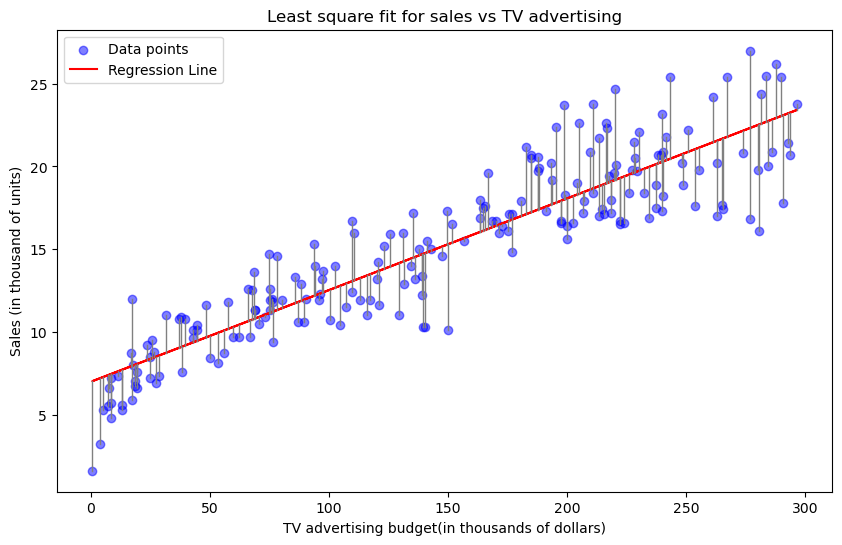

In [35]:
## creating plot to visuualize the regression line

plt.figure(figsize = (10,6))
plt.scatter(x = x, y = y, color = 'blue', label = 'Data points', alpha = 0.5)
plt.plot(x,y_pred, color = 'red', label = "Regression Line")

## Adding lines showing the residuals(the vertical distance between actual and predicted value)
for i in range(len(x)):
    plt.plot([x[i],x[i]],[y[i],y_pred[i]], color = 'grey', lw=1)

plt.title("Least square fit for sales vs TV advertising")
plt.xlabel("TV advertising budget(in thousands of dollars)")
plt.ylabel("Sales (in thousand of units)")
plt.legend()
plt.show()


## Perform Linear Regression using statsmodels:
- Add an intercept term to the independent variable TV (using sm.add_constant).
- Fit an Ordinary Least Squares (OLS) linear regression model using statsmodels.
- Print the summary of the fitted model. This summary should include:
- The coefficients (intercept and slope).
- R-squared value.
- P-values and standard errors.
- Calculate and display the 95% confidence intervals for the coefficients (intercept
and slope).
- Extract and print the standard errors for the intercept and the coefficient of TV
advertising.

In [36]:
print("β0:",model.intercept_)
print("β1:",model.coef_[0])

β0: 6.9748214882298925
β1: 0.05546477046955886


In [37]:
import statsmodels.api as sm 
x = df['TV']
y = df['Sales']

# adds a constant to the independent variable 
x_with_const = sm.add_constant(x) # adds a column of ones to x for the intercept form 

# Fit the OLS regression model using stats model
model_sm = sm.OLS(y,x_with_const).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           7.93e-74
Time:                        12:31:38   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

In [38]:
# get the 95% confidence interval for the model coefficients (β₀ and β₁)

confidence_intervals = model_sm.conf_int(alpha = 0.05)

# print the confidence intervals for the intercept  and coefficient

print("95% confidence interval for β₀:\n",confidence_intervals.iloc[0])
print("95% confidence interval for β1:\n",confidence_intervals.iloc[1])

standard_error = model_sm.bse

print("Standard error for β₀(Intercept):",standard_error.iloc[0])
print("Standard error for β1:",standard_error.iloc[1])

95% confidence interval for β₀:
 0    6.338740
1    7.610903
Name: const, dtype: float64
95% confidence interval for β1:
 0    0.051727
1    0.059203
Name: TV, dtype: float64
Standard error for β₀(Intercept): 0.32255348485240126
Standard error for β1: 0.0018955511780402408
